# Stock Price Forecasting


### **Overview**:

Examining stock market data is both intriguing and potentially lucrative, especially when strong predictive models can lead to significant financial rewards. Although the web is saturated with financial information, finding a well-structured dataset that captures essential stock metrics across various companies can be a challenge.

In this project, we will focus on a New York Stock Exchange dataset from Kaggle (https://www.kaggle.com/datasets/dgawlik/nyse/data), which includes critical stock price information—Open, Close, High, Low—alongside the date, symbol, and trading volume. Spanning from 2010 to the end of 2016, this dataset provides a solid foundation for our analysis.

Our goal is to explore these key metrics to identify patterns and trends that can inform our predictive models. By applying advanced analytical techniques, we aim to enhance our understanding of stock price movements and uncover actionable insights that could lead to financial success. Join us as we navigate the world of stock price prediction and leverage data-driven strategies for informed investment decisions.

### **Business Objective**:

To effectively forecast future stock price movements, our project aims to develop a predictive model that leverages historical data and relevant market indicators. The following objectives will guide our analysis:

1. **Develop a Predictive Model:** Create a robust predictive model that accurately forecasts future stock price movements using historical data and relevant market indicators.

2. **Identify Key Factors:** Analyze and identify the key factors and market indicators that significantly influence stock price movements, ensuring the model incorporates these variables.

3. **Enhance Prediction Accuracy:** Achieve a prediction accuracy of at least X% (define a specific percentage based on your goals) using metrics such as Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE).

4. **Evaluate Techniques:** Explore various modeling techniques (e.g., ARIMA, SARIMA, Prophet, LSTM) to determine the most effective approach for stock price prediction.

5. **Provide Actionable Insights:** Deliver actionable insights to stakeholders based on model predictions, enabling informed investment decisions and strategy development.

6. **Continuous Improvement:** Establish a framework for ongoing model evaluation and refinement to adapt to changing market conditions and improve prediction performance over time.


### **CRISP - DM Framework**

The Cross-Industry Standard Process for Data Mining (CRISP-DM) is a widely recognized framework that facilitates successful data science initiatives. This structured approach encompasses the following key phases:

1. **Business Understanding:** Define project objectives and requirements from a business perspective, identifying key stakeholders and their needs.

2. **Data Understanding:** Collect initial data and explore its characteristics, identifying data quality issues and assessing relevance.

3. **Data Preparation:** Clean and preprocess the data to ensure quality and consistency, transforming it into a suitable format for analysis.

4. **Modeling:** Select appropriate modeling techniques based on the problem and data characteristics, building and training models using the prepared data.

5. **Evaluation:** Assess the model's performance against established success criteria, reviewing the process to ensure all objectives have been met.

6. **Deployment:** Implement the model in a production environment, monitoring its performance over time and communicating results to stakeholders.

In this project, we will leverage the CRISP-DM framework to guide our analysis and ensure a systematic progression through each phase. By doing so, we aim to enhance our insights and achieve our objectives more effectively.


### **Business Understanding**

The primary goal of this project is to leverage time series analysis to develop predictive models that forecast stock price movements based on historical data. Understanding the business context is essential, as accurate predictions can empower investors to make informed decisions and potentially yield significant financial returns.

Throughout the analysis, we will explore various aspects of the dataset, including stock prices (Open, Close, High, Low), trading volume, and other relevant attributes. It is crucial to keep in mind the specific needs and objectives of our stakeholders—such as investors and financial analysts—to ensure that the final recommendations are relevant, practical, and aligned with their goals.

Key aspects to consider include:


*   What specific stock price trends are we aiming to predict? Clarifying whether we are focusing on daily, weekly, or monthly price movements will influence our modeling techniques and data preparation.
*  Who are the stakeholders? Identifying the needs of investors, portfolio managers, and financial analysts will help ensure that our insights are actionable.
*  What are the success criteria? Establishing performance metrics, such as Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE), will enable us to assess the accuracy and reliability of our time series forecasts..


We extend our gratitude to Kaggle for providing access to the New York Stock Exchange dataset (https://www.kaggle.com/datasets/dgawlik/nyse/data), which serves as the foundation for our analysis. By clearly defining the business understanding, we can align our analytical efforts to enhance market insights and drive financial success through effective time series forecasting.

### **Data Understanding: Exploratory Data Analysis (EDA)**

*   Load and Read DataSet
*   Understand Features and Datatype
*   Analyse Data and Statistics
*   Visualization
*   Decomposition & Autocorelation







### About Dataset
The stocks dataset contains total 7 features/variables including target variable named close. Here's brief about each feature:

 *   date: Date for a stock          
 *   symbol: Stock's ticker name        
 *   open: Price of a stock when market open          
 *   close: Price of a stock when market close          
 *   low: lowest price reached in a day for a stock   
 *   high: lowest price reached in a day for a stock          
 *   volume : Number of traded shares       


In [ ]:
# Install package #
!pip install prophet
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.7 MB/s eta 0:00:00


In [ ]:
# import packages #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import keras_tuner as kt

import time
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from prophet import Prophet

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# read data #
stocks_df = pd.read_csv('prices.csv')

In [ ]:
# display top rows #
stocks_df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
# dataset information #
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [ ]:
# statistics about dataset #
stocks_df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,851264.0,7.083699e+01,8.369588e+01,0.85,3.384000e+01,5.277000e+01,7.988000e+01,1.584440e+03
close,851264.0,7.085711e+01,8.368969e+01,0.86,3.385000e+01,5.280000e+01,7.989000e+01,1.578130e+03
low,851264.0,7.011841e+01,8.287729e+01,0.83,3.348000e+01,5.223000e+01,7.911000e+01,1.549940e+03
high,851264.0,7.154348e+01,8.446550e+01,0.88,3.419000e+01,5.331000e+01,8.061000e+01,1.600930e+03
volume,851264.0,5.415113e+06,1.249468e+07,0.00,1.221500e+06,2.476250e+06,5.222500e+06,8.596434e+08


In [ ]:
# shape of the dataset : columns / rows #
stocks_df.shape

(851264, 7)

In [ ]:
# list of symbols #
stocks_df['symbol'].unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [ ]:
# total symbols #
stocks_df['symbol'].nunique()

501

In [ ]:
# Determine no. of samples for each symbol #
stocks_df['symbol'].value_counts()

,count
symbol,
KSU,1762
NOC,1762
ORCL,1762
OMC,1762
OKE,1762
...,...
KHC,378
HPE,304
CSRA,284


In [ ]:
# min and max date of dataset #
stocks_df['date'].min(), stocks_df['date'].max()

('2010-01-04', '2016-12-30 00:00:00')

In [ ]:
# analyse why certain symbols have less samples #
stocks_df[stocks_df['symbol'] == 'KHC']['date'].min(), stocks_df[stocks_df['symbol'] == 'KHC']['date'].max()

('2015-07-06', '2016-12-30')

In [ ]:
# min and max date of symbol (Amazon) having 1762 #
stocks_df[stocks_df['symbol'] == 'PFE']['date'].min(), stocks_df[stocks_df['symbol'] == 'AMZN']['date'].max(), stocks_df[stocks_df['symbol'] == 'PFE'].shape

('2010-01-04', '2016-12-30', (1762, 7))

In [ ]:
# min and max date of symbol (Google) having 1762 #
stocks_df[stocks_df['symbol'] == 'GOOG']['date'].min(), stocks_df[stocks_df['symbol'] == 'GOOG']['date'].max(), stocks_df[stocks_df['symbol'] == 'GOOG'].shape

('2010-01-04', '2016-12-30', (1762, 7))

In [ ]:
# min and max date of symbol (Microsoft) having 1762 #
stocks_df[stocks_df['symbol'] == 'MSFT']['date'].min(), stocks_df[stocks_df['symbol'] == 'MSFT']['date'].max(), stocks_df[stocks_df['symbol'] == 'MSFT'].shape

('2010-01-04', '2016-12-30', (1762, 7))

In [ ]:
# min and max date of symbol (Apple) having 1762 #
stocks_df[stocks_df['symbol'] == 'AAPL']['date'].min(), stocks_df[stocks_df['symbol'] == 'AAPL']['date'].max(), stocks_df[stocks_df['symbol'] == 'AAPL'].shape

('2010-01-04', '2016-12-30', (1762, 7))

In [ ]:
# min and max date of symbol (Oracle) having 1762 #
stocks_df[stocks_df['symbol'] == 'ORCL']['date'].min(), stocks_df[stocks_df['symbol'] == 'ORCL']['date'].max(), stocks_df[stocks_df['symbol'] == 'ORCL'].shape

('2010-01-04', '2016-12-30', (1762, 7))

#### Analyze Amazon Stock

In [ ]:
amazon_df = stocks_df[stocks_df['symbol'] == 'AMZN']
amazon_df['date'] = pd.to_datetime(amazon_df['date'])
amazon_df.drop('symbol', axis = 1, inplace=True)
amazon_df.head()

,date,open,close,low,high,volume
284,2010-01-04,136.250000,133.899994,133.139999,136.610001,7599900.0
751,2010-01-05,133.429993,134.690002,131.809998,135.479996,8851900.0
1219,2010-01-06,134.600006,132.250000,131.649994,134.729996,7178800.0
1687,2010-01-07,132.009995,130.000000,128.800003,132.320007,11030200.0
2155,2010-01-08,130.559998,133.520004,129.029999,133.679993,9830500.0


In [ ]:
px.line(amazon_df,x="date",y=["high","low"],title="Difference between high and low prices of Amazon stock")

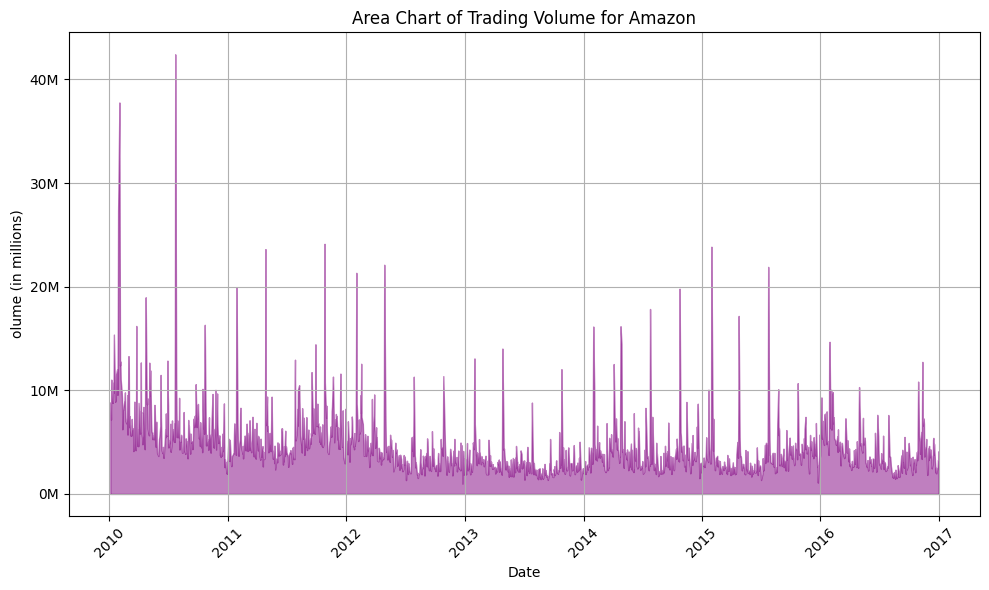

In [ ]:
# Plot area chart of volume by date #
plt.figure(figsize=(10, 6))
plt.fill_between(amazon_df['date'], amazon_df['volume'], color='purple', alpha=0.5)

# format Y-axis to show values in thousands #
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x / 1000000)}M'))

plt.title('Area Chart of Trading Volume for Amazon')
plt.xlabel('Date')
plt.ylabel('Volume (in millions)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

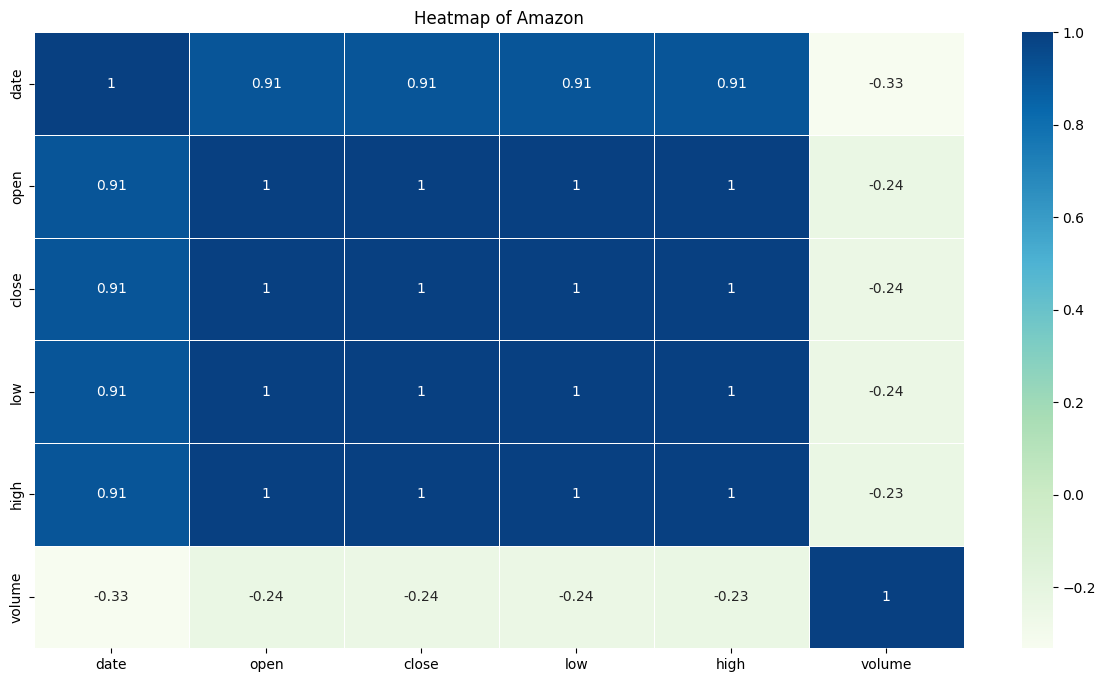

In [ ]:
# heat map to show corelation #
fig=plt.figure(figsize=(15,8))
sns.heatmap(amazon_df.corr(), annot=True, cmap='GnBu', linecolor='white', linewidth=0.5)
plt.title('Heatmap of Amazon')
plt.show()

In [ ]:
amazon_df.set_index('date', inplace=True)
amazon_df.head()

,open,close,low,high,volume
date,,,,,
2010-01-04,136.250000,133.899994,133.139999,136.610001,7599900.0
2010-01-05,133.429993,134.690002,131.809998,135.479996,8851900.0
2010-01-06,134.600006,132.250000,131.649994,134.729996,7178800.0
2010-01-07,132.009995,130.000000,128.800003,132.320007,11030200.0
2010-01-08,130.559998,133.520004,129.029999,133.679993,9830500.0


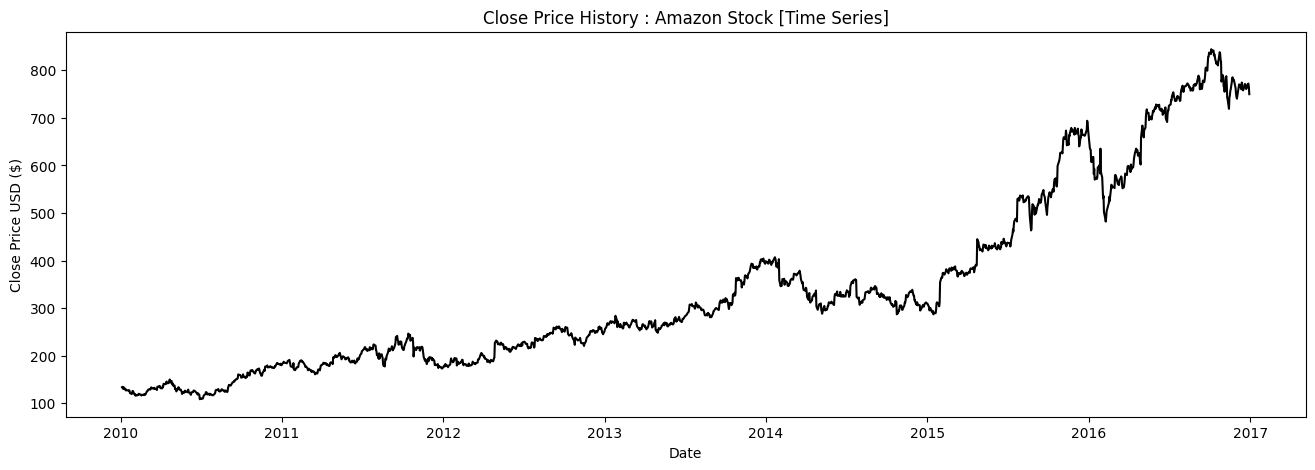

In [ ]:
# Time Series Plot #
plt.figure(figsize=(16,5))
plt.plot(amazon_df['close'], 'k')
plt.title('Close Price History : Amazon Stock [Time Series]')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

<Figure size 1200x600 with 0 Axes>

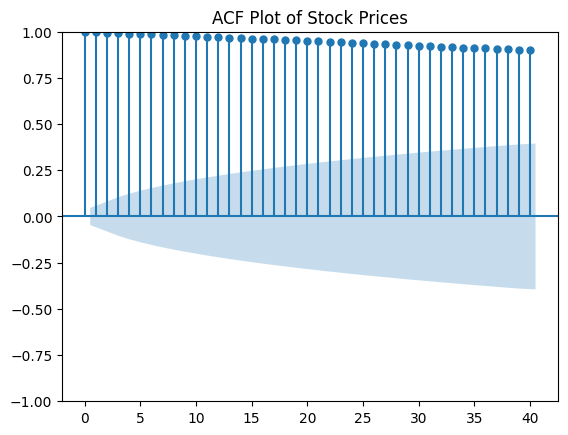

In [ ]:
plt.figure(figsize=(12, 6))
plot_acf(amazon_df['close'], lags=40)
plt.title('ACF Plot of Stock Prices')
plt.show()

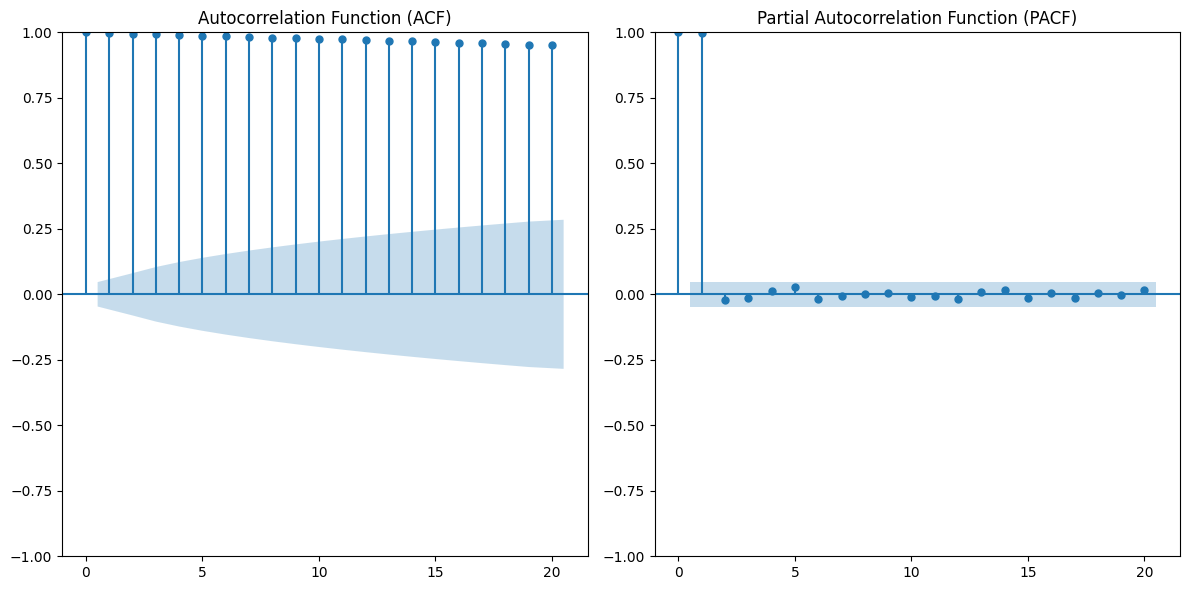

In [ ]:
# Plot ACF #
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(amazon_df['close'], lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# Plot PACF #
plt.subplot(1, 2, 2)
plot_pacf(amazon_df['close'], lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

#### Seasonal decompose

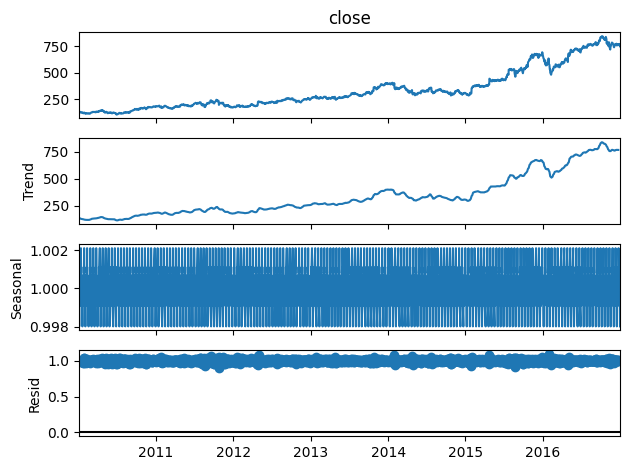

In [ ]:
# multiplicative seasonal decompose #
fig = seasonal_decompose(amazon_df[amazon_df['close'] > 0]['close'], model='multiplicative',period=10).plot()
fig.show()

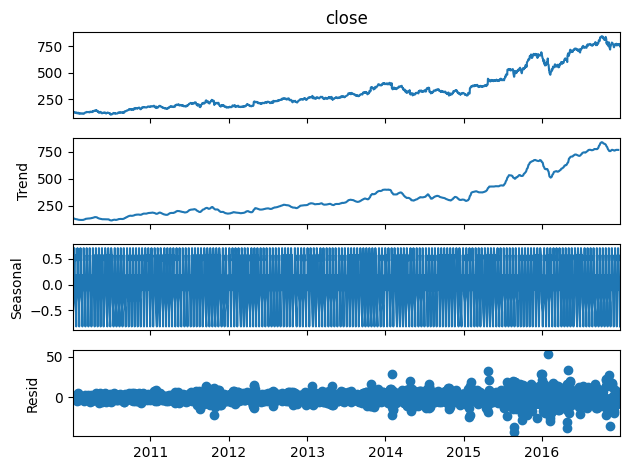

In [ ]:
# additive seasonal decompose #
fig = seasonal_decompose(amazon_df[amazon_df['close'] > 0]['close'], model='additive',period=10).plot()
fig.show()

### Trend Analysis

In [ ]:
train_size = int(len(amazon_df) * 0.85)
X_train = amazon_df[:train_size]
X_test = amazon_df[train_size:]

In [ ]:
period = 100

filt = np.ones(period+1)
filt[0] = 0.5
filt[-1] = 0.5
filt /= period
sum(filt)

1.0000000000000007

In [ ]:
from statsmodels.tsa.seasonal import _extrapolate_trend
trend = convolution_filter(X_train['close'], filt)
trend = _extrapolate_trend(trend, period + 1)

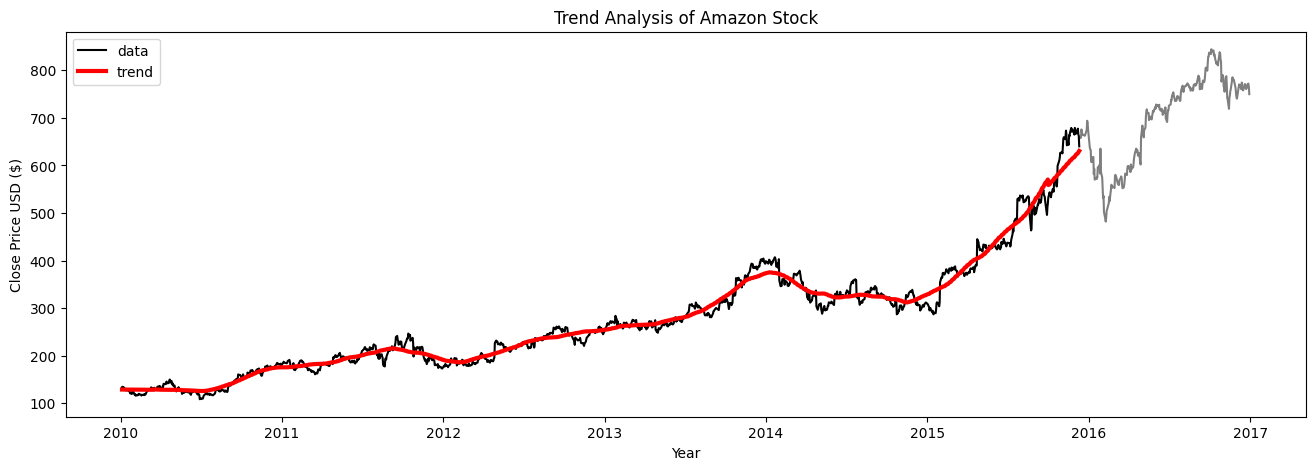

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(X_train['close'], 'k',label='data')
plt.plot(trend,'r',linewidth=3,label='trend')
plt.plot(X_test['close'],'k',alpha=0.5)
plt.title('Trend Analysis of Amazon Stock')
plt.xlabel('Year')
plt.ylabel('Close Price USD ($)')
plt.legend()
plt.show()


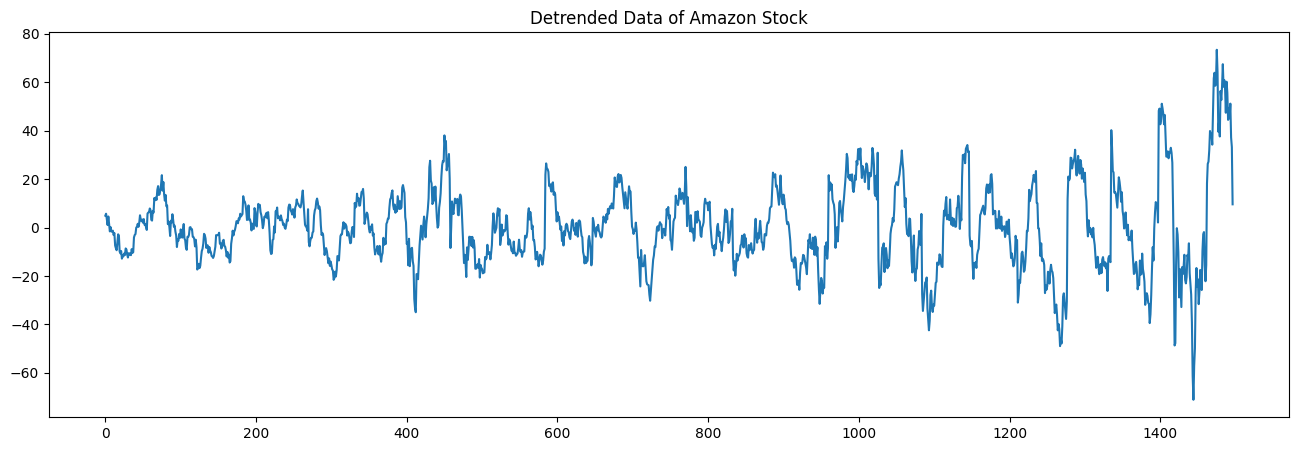

In [ ]:
detrended = X_train['close'] - trend
detrended = detrended.to_numpy()
plt.figure(figsize=(16,5))
plt.plot(detrended)
plt.title('Detrended Data of Amazon Stock')
plt.show()

#**Data Preparation**

*   Handle Outliers, correct data types
*   Handle Missing Values
*   Drop features & duplicates
*   Feature Encoding
*   Handling inconsistent data (example: price shouldn't be less than 1)
*   Visualize cleaned Data

In [ ]:
# setup stocks #
stocks_new_df = stocks_df.copy()

In [ ]:
# data type check #
stocks_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


#### Outliers

In [ ]:
# drop records not in a desired date format #
date_format = "%Y-%m-%d"
stocks_new_df['date'] = pd.to_datetime(stocks_new_df['date'], format=date_format, errors='coerce')
stocks_new_df = stocks_new_df.dropna(subset=['date'])

In [ ]:
# Calculate z-scores for each column individually #
z_scores = stocks_new_df[['open', 'close', 'low', 'high', 'volume']].apply(stats.zscore)
stocks_new_df['z_score'] = np.mean(z_scores, axis=1)
outliers = stocks_new_df[stocks_new_df['z_score'] > 3]
stocks_new_df.drop('z_score', axis=1, inplace=True)

#### Missing Values & Duplicate Records

In [ ]:
# missing values ??? #
print('Missing Values:\n', stocks_new_df.isnull().sum())
print('Missing Values %: \n', stocks_new_df.isnull().sum() / stocks_df.count() * 100)

Missing Values:
 date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64
Missing Values %: 
 date      0.0
symbol    0.0
open      0.0
close     0.0
low       0.0
high      0.0
volume    0.0
dtype: float64


In [ ]:
print(f"Total duplicate rows: {stocks_new_df.duplicated().sum()}")

Total duplicate rows: 0


#### Handle Inconsistent Values

In [ ]:
# ignore negative value records #
stocks_new_df = stocks_new_df[(stocks_new_df[['open', 'close', 'low', 'high', 'volume']] >= 0).all(axis=1)]
stocks_new_df

,date,symbol,open,close,low,high,volume
251,2010-01-04,A,31.389999,31.300001,31.130000,31.630001,3815500.0
252,2010-01-04,AAL,4.840000,4.770000,4.660000,4.940000,9837300.0
253,2010-01-04,AAP,40.700001,40.380001,40.360001,41.040001,1701700.0
254,2010-01-04,AAPL,213.429998,214.009998,212.380001,214.499996,123432400.0
255,2010-01-04,ABC,26.290001,26.629999,26.139999,26.690001,2455900.0
...,...,...,...,...,...,...,...
851257,2016-12-30,YHOO,38.720001,38.669998,38.430000,39.000000,6431600.0
851258,2016-12-30,YUM,63.930000,63.330002,63.160000,63.939999,1887100.0
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0


### Select & Split the data

In [ ]:
# select symbol / ticker #
symbol = 'AMZN'
stock = stocks_new_df[stocks_new_df['symbol'] == symbol]
stock['date'] = pd.to_datetime(stock['date'])
stock.drop('symbol', axis = 1, inplace=True)
stock.set_index('date', inplace=True)
stock.head()

,open,close,low,high,volume
date,,,,,
2010-01-04,136.250000,133.899994,133.139999,136.610001,7599900.0
2010-01-05,133.429993,134.690002,131.809998,135.479996,8851900.0
2010-01-06,134.600006,132.250000,131.649994,134.729996,7178800.0
2010-01-07,132.009995,130.000000,128.800003,132.320007,11030200.0
2010-01-08,130.559998,133.520004,129.029999,133.679993,9830500.0


In [ ]:
train_size = int(len(stock) * 0.85)
X_train = stock[:train_size]
X_test = stock[train_size:]

### Visualize selected Clean Symbol

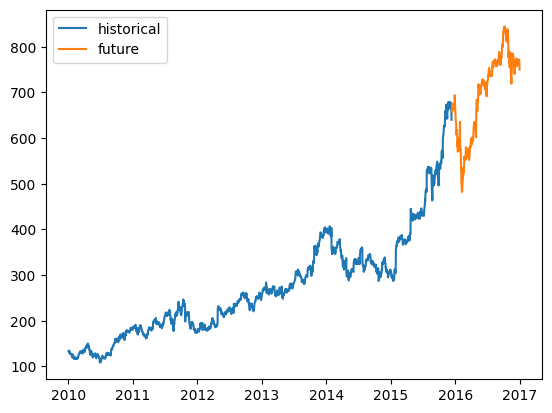

In [ ]:
plt.plot(X_train['close'], label = 'historical')
plt.plot(X_test['close'], label = 'future')
plt.legend();

### Check if data is stationary

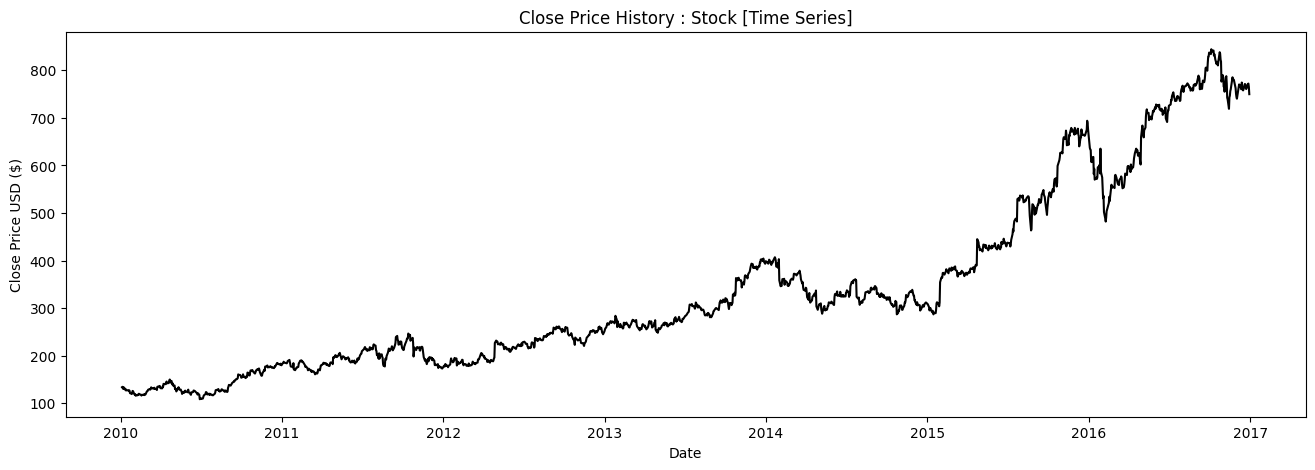

In [ ]:
# Time Series Plot #
plt.figure(figsize=(16,5))
plt.plot(stock['close'], 'k')
plt.title('Close Price History : Stock [Time Series]')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

<Figure size 1200x600 with 0 Axes>

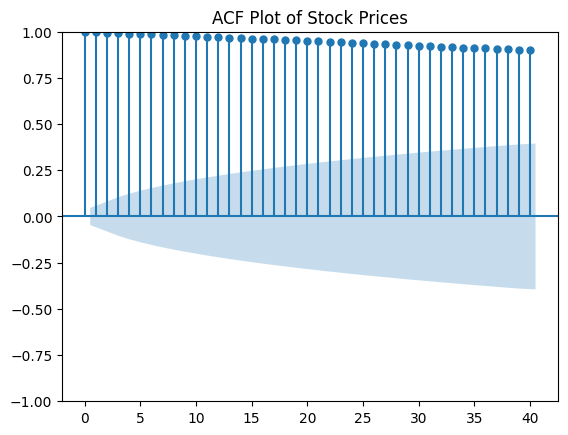

In [ ]:
# ACF #
plt.figure(figsize=(12, 6))
plot_acf(stock['close'], lags=40)
plt.title('ACF Plot of Stock Prices')
plt.show()

#### Data Transformation to bring stationary

In [ ]:
stock['Diff_close'] = stock['close'].diff().dropna()
stock['Diff_close'].iloc[0] = 0

In [ ]:
train_size = int(len(stock) * 0.85)
X_train = stock[:train_size]
X_test = stock[train_size:]

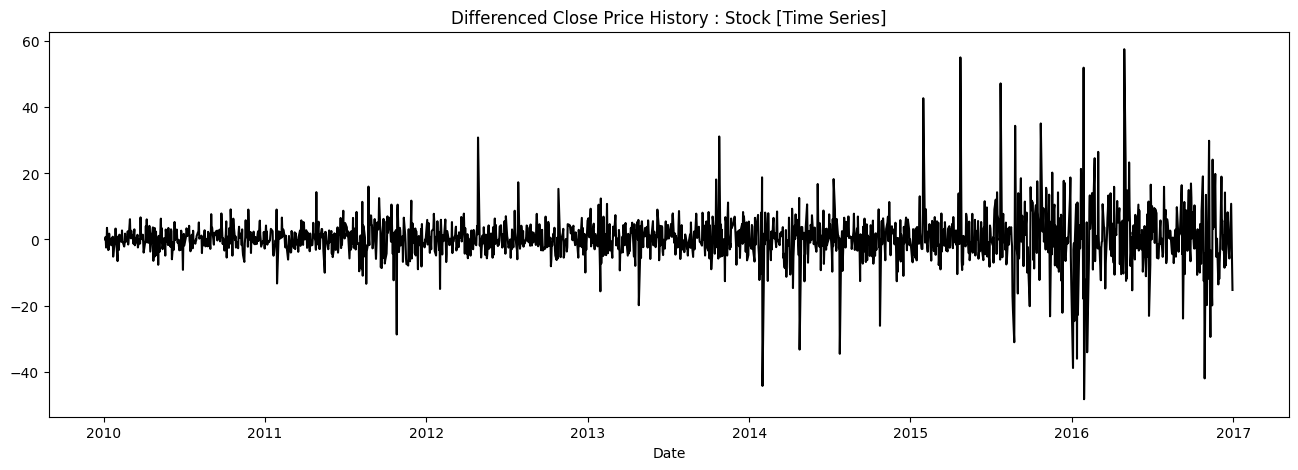

In [ ]:
# Time Series Plot #
plt.figure(figsize=(16,5))
plt.plot(stock['Diff_close'], 'k')
plt.title('Differenced Close Price History : Stock [Time Series]')
plt.xlabel('Date')
plt.show()

<Figure size 1200x600 with 0 Axes>

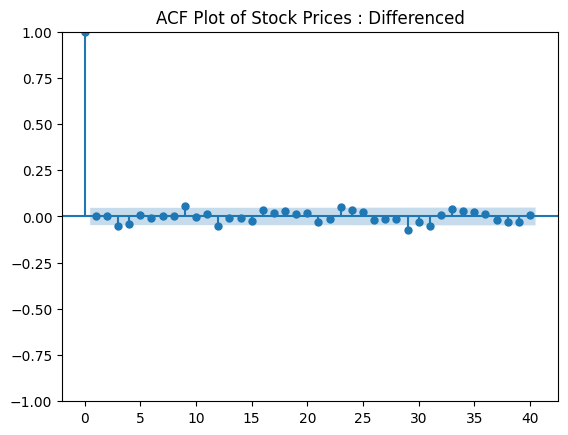

In [ ]:
# ACF #
plt.figure(figsize=(12, 6))
plot_acf(stock['Diff_close'], lags=40)
plt.title('ACF Plot of Stock Prices : Differenced')
plt.show()

# **Modeling**

We are going to analyse the data against various models through different hyperparameters and perform cross validation to determine the best suited model for a dataset. The models used in current applications are:


*   ARIMA
*   SARIMA
*   Prophet
*   LSTM

#### Parameter Tuning

In [ ]:
# Define a function to evaluate ARIMA model #
def evaluate_arima(params):
    p, d, q = params
    model = ARIMA(stock['close'], order=(p, d, q))
    model_fit = model.fit()
    return model_fit.aic  # Use AIC for model selection

# Define parameter grid for ARIMA #
param_grid_arima = {
    'p': range(0, 3),
    'd': range(0, 2),
    'q': range(0, 3)
}

# Perform grid search for ARIMA #
best_aic = float('inf')
best_params_arima = None

for p in param_grid_arima['p']:
    for d in param_grid_arima['d']:
        for q in param_grid_arima['q']:
            try:
                aic = evaluate_arima((p, d, q))
                if aic < best_aic:
                    best_aic = aic
                    best_params_arima = (p, d, q)
            except:
                continue

print(f"Best ARIMA parameters: p={best_params_arima[0]}, d={best_params_arima[1]}, q={best_params_arima[2]}")

Best ARIMA parameters: p=2, d=1, q=2


In [ ]:
# Define a function to evaluate SARIMA model #
def evaluate_sarima(params):
    p, d, q, P, D, Q, s = params
    model = SARIMAX(stock['close'], order=(p, d, q), seasonal_order=(P, D, Q, s))
    model_fit = model.fit(disp=False)
    return model_fit.aic  # Use AIC for model selection

# Define parameter grid for SARIMA #
param_grid_sarima = {
    'p': range(0, 3),
    'd': range(0, 2),
    'q': range(0, 3),
    'P': range(0, 2),
    'D': range(0, 2),
    'Q': range(0, 2),
    's': [12]  # Monthly seasonality
}

# Perform grid search for SARIMA #
best_aic_sarima = float('inf')
best_params_sarima = None

for p in param_grid_sarima['p']:
    for d in param_grid_sarima['d']:
        for q in param_grid_sarima['q']:
            for P in param_grid_sarima['P']:
                for D in param_grid_sarima['D']:
                    for Q in param_grid_sarima['Q']:
                        try:
                            aic = evaluate_sarima((p, d, q, P, D, Q, 12))
                            if aic < best_aic_sarima:
                                best_aic_sarima = aic
                                best_params_sarima = (p, d, q, P, D, Q)
                        except:
                            continue

print(f"Best SARIMA parameters: p={best_params_sarima[0]}, d={best_params_sarima[1]}, q={best_params_sarima[2]}, P={best_params_sarima[3]}, D={best_params_sarima[4]}, Q={best_params_sarima[5]}")

Best SARIMA parameters: p=0, d=0, q=2, P=1, D=0, Q=1


In [ ]:
train = X_train[['Diff_close']]
test = X_test[['Diff_close']]
p_train = X_train[['close']]
p_test = X_test[['close']]

In [ ]:
# ARIMA Model #
# Start the timer #
start_time = time.time()
arma = ARIMA(train, order=(2, 1, 2)).fit() # use parameter suggested by parameter tuning #
# Stop the timer #
end_time = time.time()
# Calculate the training time
arima_training_time = end_time - start_time
arima_train_preds = arma.predict()
arima_test_preds = arma.forecast(len(test))
arima_test_preds.index = test.index
# Inverse Transform the Predictions
arima_last_train_value = stock['close'].iloc[train_size - 1] #This line was not executed in the previous cell
arima_predicted_prices = arima_last_train_value + arima_test_preds.cumsum()

In [ ]:
print(f"Arima Training Time: {arima_training_time:.2f} seconds")

Arima Training Time: 1.88 seconds


In [ ]:
# SARIMA Model #
# Start the timer #
start_time = time.time()
sarima = SARIMAX(train, order=(0, 0, 2),seasonal_order=(1, 0, 1, 12)).fit()  # use parameter suggested by parameter tuning #
# Stop the timer #
end_time = time.time()
# Calculate the training time
sarima_training_time = end_time - start_time
sarima_train_preds = sarima.predict()
sarima_test_preds = sarima.forecast(len(test))
sarima_test_preds.index = test.index
last_train_value = stock['close'].iloc[train_size - 1]
sarima_predicted_prices = last_train_value + sarima_test_preds.cumsum()

In [ ]:
print(f"Sarima Training Time: {sarima_training_time:.2f} seconds")

Sarima Training Time: 1.87 seconds


In [ ]:
# Prophet Model #
# Start the timer #
start_time = time.time()
prophet_train = pd.DataFrame(p_train)
prophet_train.reset_index(inplace=True)
prophet_train.columns = ['ds', 'y']
prophet_test = pd.DataFrame(p_test)
prophet_test.reset_index(inplace=True)
prophet_test.columns = ['ds', 'y']
prophet = Prophet()
prophet.fit(prophet_train)
# Stop the timer #
end_time = time.time()
# Calculate the training time
prophet_training_time = end_time - start_time
prophet_test_df = prophet.make_future_dataframe(periods=len(prophet_test)) # 180 more days #
prophet_test_preds = prophet.predict(prophet_test_df)
# extract predictions for the test period #
prophet_predicted = prophet_test_preds[['ds', 'yhat']].tail(len(p_test))
 # Merge actual and predicted values for evaluation
prophet_results = pd.merge(prophet_test, prophet_predicted, on='ds', how='inner')

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppxwjwnv1/ui0ahjpe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppxwjwnv1/ngm0wdfp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27091', 'data', 'file=/tmp/tmppxwjwnv1/ui0ahjpe.json', 'init=/tmp/tmppxwjwnv1/ngm0wdfp.json', 'output', 'file=/tmp/tmppxwjwnv1/prophet_modelkcbz4ca3/prophet_model-20241002000534.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:05:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:05:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
print(f"Prophet Training Time: {prophet_training_time:.2f} seconds")

Prophet Training Time: 0.72 seconds


In [ ]:
# Prophet Model #
# Start the timer #
start_time = time.time()
prophet_train = pd.DataFrame(train)
prophet_train.reset_index(inplace=True)
prophet_train.columns = ['ds', 'y']
prophet_test = pd.DataFrame(test)
prophet_test.reset_index(inplace=True)
prophet_test.columns = ['ds', 'y']
prophet = Prophet()
prophet.fit(prophet_train)
# Stop the timer #
end_time = time.time()
# Calculate the training time
prophet_training_time = end_time - start_time
prophet_test_df = prophet.make_future_dataframe(periods=len(prophet_test)) # 180 more days #
prophet_test_preds = prophet.predict(prophet_test_df)

# Extract predictions for the test period
predicted_diff = prophet_test_preds['yhat'].tail(len(test))
last_train_value = stock['close'].iloc[train_size - 1]  # Last known closing price from training set
prophet_test_preds['yhat_original'] = predicted_diff.cumsum() + last_train_value
prophet_test_preds['yhat_lower_original'] = prophet_test_preds['yhat_lower'].cumsum() + last_train_value
prophet_test_preds['yhat_upper_original'] = prophet_test_preds['yhat_upper'].cumsum() + last_train_value

# extract predictions for the test period #
prophet_predicted = prophet_test_preds[['ds', 'yhat_original','yhat']].tail(len(p_test))
 # Merge actual and predicted values for evaluation
prophet_results = pd.merge(prophet_test, prophet_predicted, on='ds', how='inner')

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppxwjwnv1/gkbb_7c1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppxwjwnv1/omg379n4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18489', 'data', 'file=/tmp/tmppxwjwnv1/gkbb_7c1.json', 'init=/tmp/tmppxwjwnv1/omg379n4.json', 'output', 'file=/tmp/tmppxwjwnv1/prophet_model_mh4r0a5/prophet_model-20241002000541.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:05:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:05:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# step 1: define function for LSTM #
def buildLSTM(hp):
    model = Sequential()
    look_back = hp.Int('look_back', min_value=5, max_value=30, step=5)
    model.add(LSTM(units=hp.Int('units', min_value=10, max_value=100, step=10), return_sequences=True, input_shape=(look_back, 1)))
    model.add(Dropout(hp.Float('dropout', 0.1, 0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units2', min_value=10, max_value=100, step=10)))
    model.add(Dropout(hp.Float('dropout2', 0.1, 0.5, step=0.1)))
    model.add(Dense(1))
    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']), loss='mean_squared_error')

    return model

# step 2: create dataset with look_back #
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back - 1):
        X.append(dataset[i:(i + look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

# step 3: determine best hyperparamter  #
tuner = kt.Hyperband(
    buildLSTM,
    objective='val_loss',
    max_epochs=50,
    factor=3,
    directory='.',
    project_name='stockpriceforcasting'
)

# step 4: prepare LSTM dataset #
prices = stock['close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)
lstm_train_size = int(len(scaled_prices) * 0.85)
lstm_train, lstm_test = scaled_prices[:lstm_train_size], scaled_prices[lstm_train_size:]



In [ ]:
# Step 5: Create Training and Validation Datasets #
look_back_initial = 10  # Initial value for the first run
X_train_initial, y_train_initial = create_dataset(lstm_train, look_back_initial)
X_val_initial, y_val_initial = create_dataset(lstm_train[int(len(lstm_train) * 0.8):], look_back_initial)

# step 6: Run the hyperparameter tuning #
tuner.search(X_train_initial, y_train_initial,epochs=50, validation_data=(X_val_initial, y_val_initial))

Trial 90 Complete [00h 00m 43s]
val_loss: 0.00043771741911768913

Best val_loss So Far: 0.00026503423578105867
Total elapsed time: 00h 22m 01s


In [ ]:
# step 7: Retrieve the Best Model #
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters:")
print(f"Look Back: {best_hyperparameters.get('look_back')}")
print(f"Units: {best_hyperparameters.get('units')}")
print(f"Dropout: {best_hyperparameters.get('dropout')}")
print(f"Optimizer: {best_hyperparameters.get('optimizer')}")

Best Hyperparameters:
Look Back: 20
Units: 70
Dropout: 0.1
Optimizer: adam


In [ ]:
# Step 8: Create Final Training Data #
look_back_value = best_hyperparameters.get('look_back')
X_train_final, y_train_final = create_dataset(lstm_train, look_back_value)
X_train_final = X_train_final.reshape(X_train_final.shape[0], X_train_final.shape[1], 1)

# Fit the best model
best_model.fit(X_train_final, y_train_final, epochs=100, batch_size=32)

# Step 9: Make Predictions and Evaluate
X_test_final, y_test_final = create_dataset(lstm_test, look_back_value)
X_test_final = X_test_final.reshape(X_test_final.shape[0], X_test_final.shape[1], 1)

lstm_test_predict = best_model.predict(X_test_final)
lstm_test_predict = scaler.inverse_transform(lstm_test_predict)

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 3.7251e-04
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 4.0946e-04
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.9811e-04
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 3.7122e-04
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 3.0740e-04
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 3.2088e-04
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.6243e-04
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 2.7492e-04
Epoch 9/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 2.9213e-04
Epoch 10/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 2.9807e-04
Epoch 11/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 3.3624e-04
Epoch 12/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.9423e-04
Epoch 13/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.7132e-04
Epoch 14/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.9909e-04
E

# **Evaluation**

In order to determine the best suited model (<<>>), we are going to perform following:

*   Model Indicators i.e., MSE, RSME, R2 Score
*   Coefficients and Intercept
*   Predict the Price against Test Dataset (Actual vs Predicted)
*   Visualize Actual Vs Predicted
*   Visualize Time Series Interval
*   Visualize Confidence Interval


In [ ]:
# Calculate performance metrics #
#rmse#
arma_rmse = np.sqrt(mean_squared_error(X_test['Diff_close'], arima_test_preds))
sarima_rmse = np.sqrt(mean_squared_error(X_test['Diff_close'], sarima_test_preds))
prophet_rmse = np.sqrt(mean_squared_error(prophet_results['y'], prophet_results['yhat']))
lstm_rmse = np.sqrt(mean_absolute_error(prices[lstm_train_size + look_back_value + 1:], lstm_test_predict))

#mae #
arma_mae = mean_absolute_error(X_test['Diff_close'], arima_test_preds)
sarima_mae = mean_absolute_error(X_test['Diff_close'], sarima_test_preds)
prophet_mae = mean_absolute_error(prophet_results['y'], prophet_results['yhat'])
lstm_mae = mean_absolute_error(prices[lstm_train_size + look_back_value + 1:], lstm_test_predict)

# R2 Score #
arima_r2 = r2_score(X_test['Diff_close'], arima_test_preds)
sarima_r2 = r2_score(X_test['Diff_close'], sarima_test_preds)
prophet_r2 = r2_score(prophet_results['y'], prophet_results['yhat'])
lstm_r2 = r2_score(prices[lstm_train_size + look_back_value + 1:], lstm_test_predict)

# Print performance metrics #
print(f'ARMA RMSE: {arma_rmse}, MAE: {arma_mae}, R2: {arima_r2}')
print(f'SARIMA RMSE: {sarima_rmse}, MAE: {sarima_mae} , R2: {sarima_r2}')
print(f'Prophet RMSE: {prophet_rmse}, MAE: {prophet_mae}, R2: {sarima_r2}')
print(f'LSTM RMSE: {lstm_rmse}, MAE: {lstm_mae}, R2: {lstm_r2}')

ARMA RMSE: 12.022076858138016, MAE: 8.302433467307774, R2: -0.0007748709202275439
SARIMA RMSE: 12.028861332075671, MAE: 8.306890989982996 , R2: -0.0019047334139437044
Prophet RMSE: 12.248475624165465, MAE: 8.158271430814189, R2: -0.0019047334139437044
LSTM RMSE: 3.840577202543291, MAE: 14.750033248695251, R2: 0.9587348581397781


In [ ]:
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           Diff_close   No. Observations:                 1497
Model:             SARIMAX(0, 0, 2)x(1, 0, [1], 12)   Log Likelihood               -4797.608
Date:                              Wed, 02 Oct 2024   AIC                           9605.215
Time:                                      00:30:09   BIC                           9631.771
Sample:                                           0   HQIC                          9615.109
                                             - 1497                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0248      0.018      1.348      0.178      -0.011       0.061
ma.L2         -0.0479      0.020     -2.409      0.016      -0.087      -0.009
ar.S.L12      -0.4232      0.373     -1.134      0.257      -1.155       0.308
ma.S.L12       0.3774      0.383      0.986      0.324      -0.372       1.127
sigma2        35.5798      0.441     80.600      0.000      34.715      36.445
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             15257.06
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               4.28   Skew:                             0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Diff_close   No. Observations:                 1497
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4795.801
Date:                Wed, 02 Oct 2024   AIC                           9601.601
Time:                        00:30:09   BIC                           9628.154
Sample:                             0   HQIC                          9611.494
                               - 1497                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5381      0.229      2.350      0.019       0.089       0.987
ar.L2         -0.0753      0.019     -4.053      0.000      -0.112      -0.039
ma.L1         -1.5115      0.229     -6.606      0.000      -1.960      -1.063
ma.L2          0.5133      0.228      2.249      0.025       0.066       0.961
sigma2        35.5238      0.445     79.846      0.000      34.652      36.396
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             15170.44
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               4.24   Skew:                             0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# LSTM #
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 20, 70)              │          20,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 70)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 70)                  │          39,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 70)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              71 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 179,135 (699.75 KB)

 Trainable params: 59,711 (233.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 119,424 (466.50 KB)

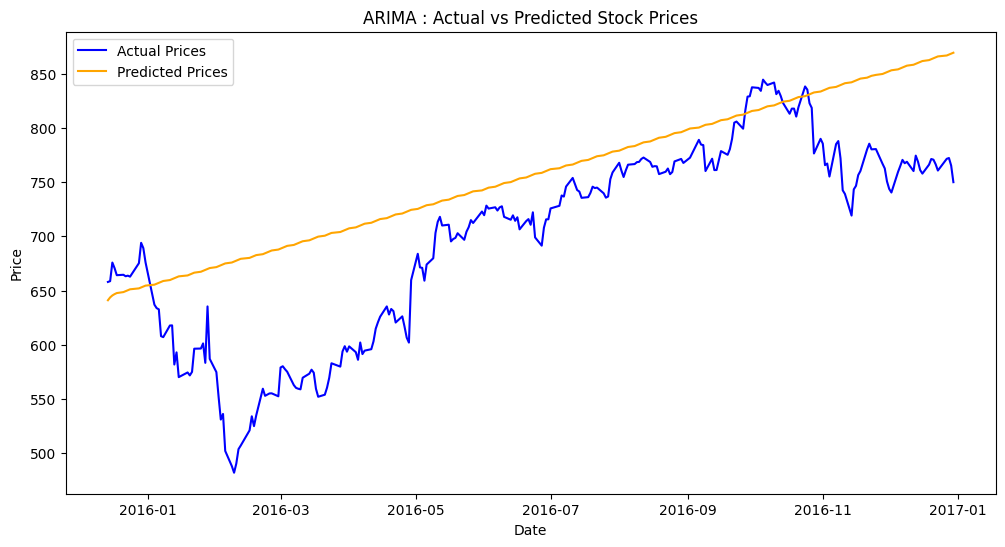

In [ ]:
# Plot the ARIMA results : Actual vs Forecast #
actual_prices = stock['close'][train_size:]
plt.figure(figsize=(12, 6))
plt.plot(actual_prices.index, actual_prices, label='Actual Prices', color='blue')
plt.plot(actual_prices.index, arima_predicted_prices, label='Predicted Prices', color='orange')
plt.title('ARIMA : Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

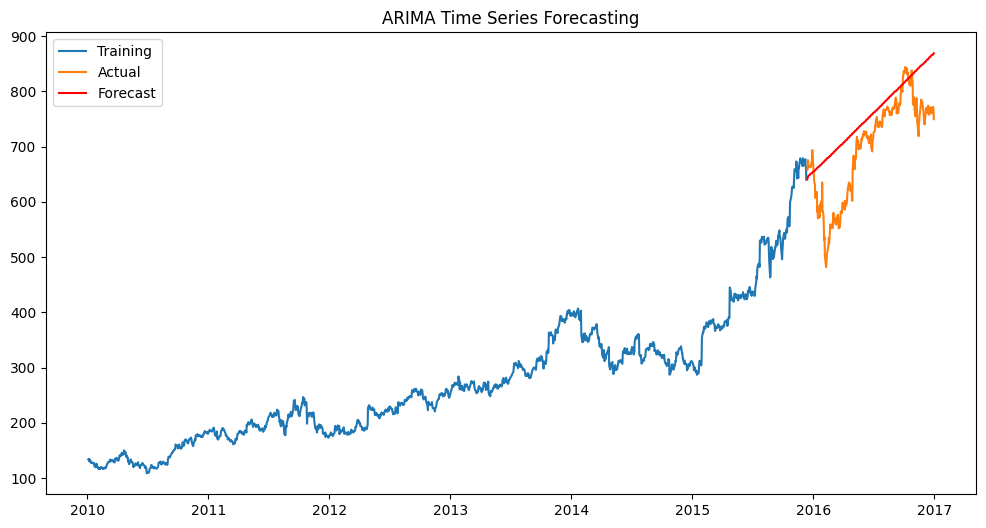

In [ ]:
# Plot the ARIMA results #
plt.figure(figsize=(12, 6))
plt.plot(X_train['close'], label='Training')
plt.plot(X_test['close'], label='Actual')
plt.plot(arima_predicted_prices, label='Forecast', color='red')
plt.title('ARIMA Time Series Forecasting')
plt.legend()
plt.show()

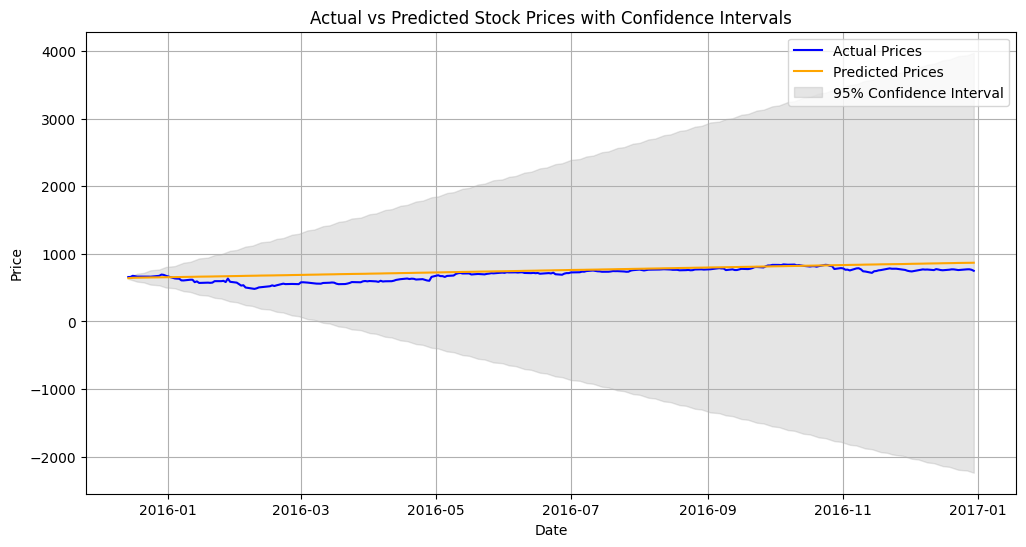

In [ ]:
# ARIMA : Confidence Level #
forecast_result = arma.get_forecast(steps=len(test))
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Inverse Transform the Confidence Intervals
conf_int_original = last_train_value + conf_int.cumsum()

# Plotting with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(actual_prices.index, actual_prices, label='Actual Prices', color='blue')
plt.plot(actual_prices.index, arima_predicted_prices, label='Predicted Prices', color='orange')
plt.fill_between(actual_prices.index, conf_int_original.iloc[:, 0], conf_int_original.iloc[:, 1], color='gray', alpha=0.2, label='95% Confidence Interval')
plt.title('Actual vs Predicted Stock Prices with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

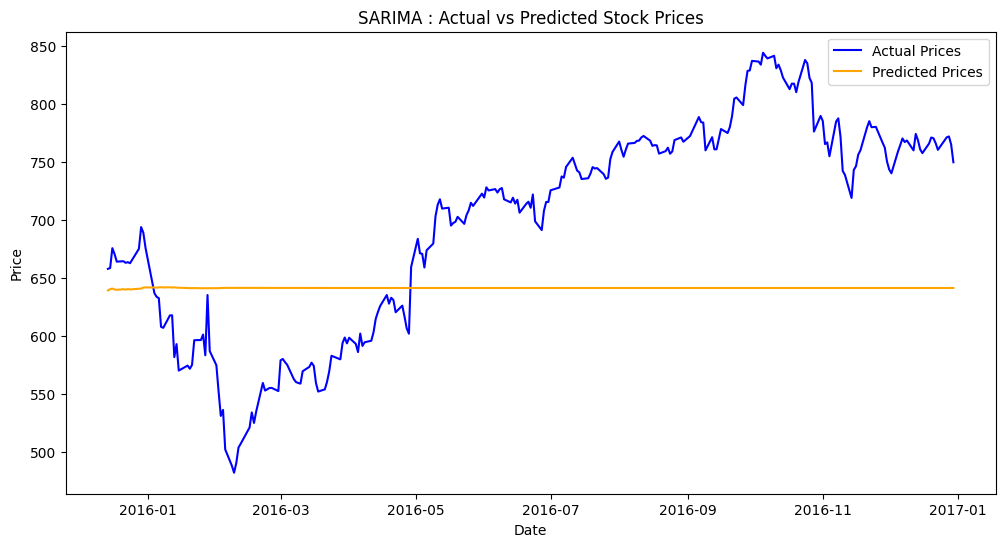

In [ ]:
# Plot the SARIMA results : Actual vs Forecast #
actual_prices = stock['close'][train_size:]
plt.figure(figsize=(12, 6))
plt.plot(actual_prices.index, actual_prices, label='Actual Prices', color='blue')
plt.plot(actual_prices.index, sarima_predicted_prices, label='Predicted Prices', color='orange')
plt.title('SARIMA : Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

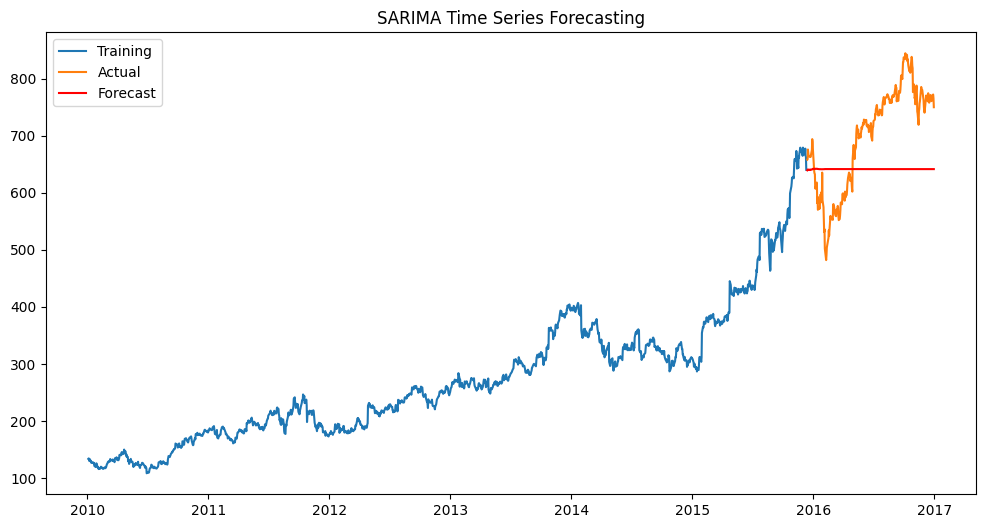

In [ ]:
# Plot the SARIMA results #
plt.figure(figsize=(12, 6))
#plt.plot(train, label='Training')
#plt.plot(test, label='Actual')
plt.plot(X_train['close'], label='Training')
plt.plot(X_test['close'], label='Actual')
plt.plot(sarima_predicted_prices, label='Forecast', color='red')
plt.title('SARIMA Time Series Forecasting')
plt.legend()
plt.show()


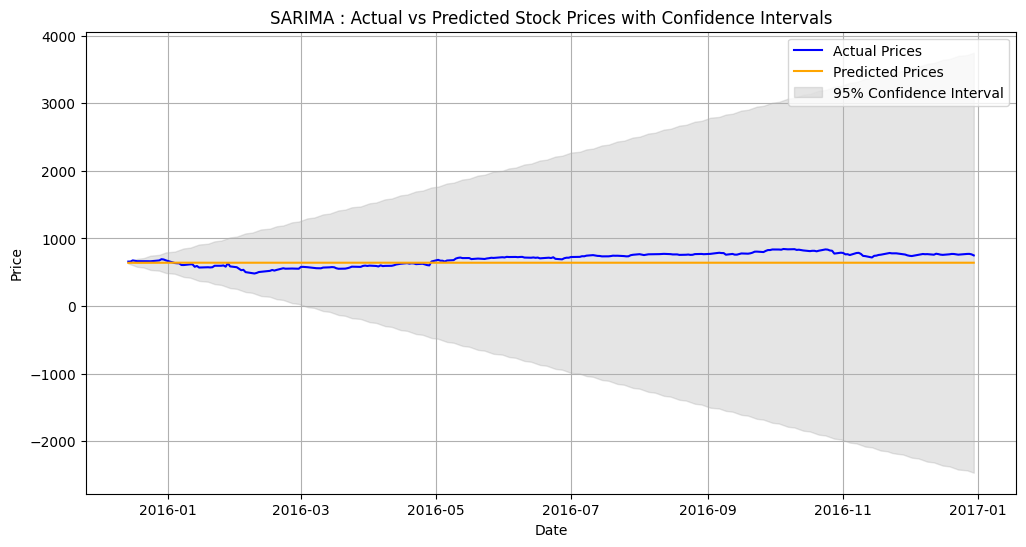

In [ ]:
# SARIMA : Confidence Level #
forecast_result = sarima.get_forecast(steps=len(test))
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Inverse Transform the Confidence Intervals
conf_int_original = last_train_value + conf_int.cumsum()

# Plotting with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(actual_prices.index, actual_prices, label='Actual Prices', color='blue')
plt.plot(actual_prices.index, sarima_predicted_prices, label='Predicted Prices', color='orange')
plt.fill_between(actual_prices.index, conf_int_original.iloc[:, 0], conf_int_original.iloc[:, 1], color='gray', alpha=0.2, label='95% Confidence Interval')
plt.title('SARIMA : Actual vs Predicted Stock Prices with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

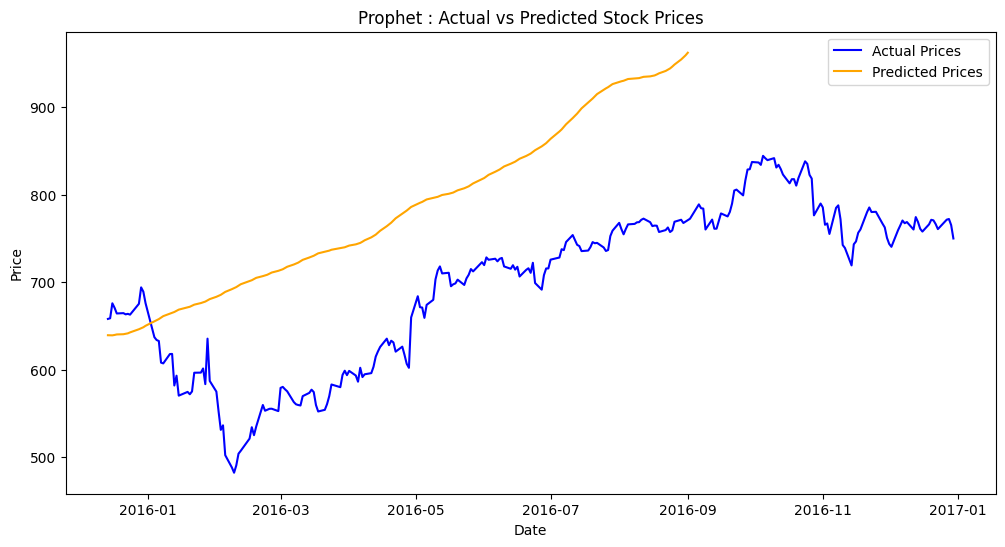

In [ ]:
# Plot the Prophet results : Actual vs Forecast #
actual_prices = stock['close'][train_size:]
plt.figure(figsize=(12, 6))
plt.plot(actual_prices.index, actual_prices, label='Actual Prices', color='blue')
plt.plot(prophet_results['ds'], prophet_results['yhat_original'], label='Predicted Prices', color='orange')
plt.title('Prophet : Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

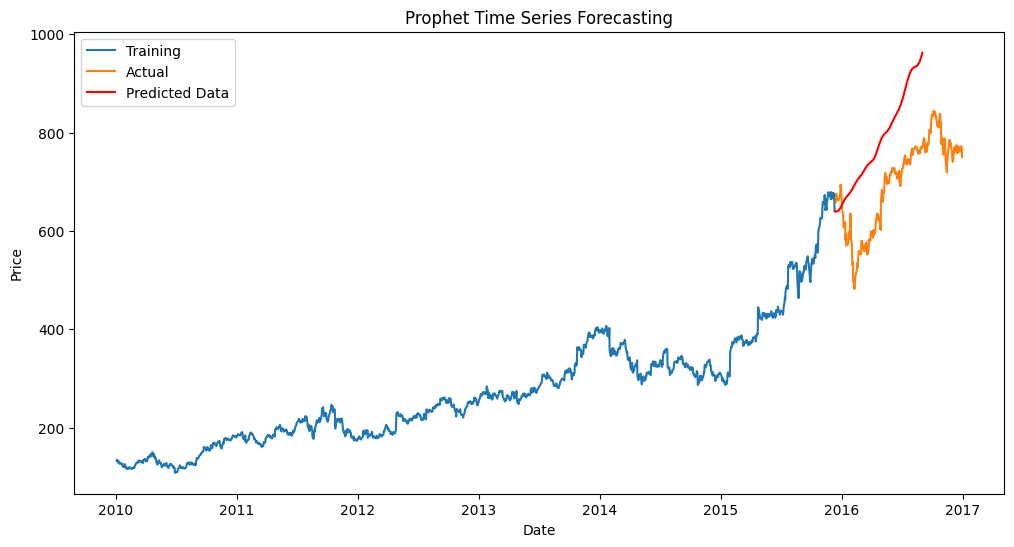

In [ ]:
plt.figure(figsize=(12, 6))
#plt.plot(prophet_train['ds'], prophet_train['y'], label='Training Data')
#plt.plot(prophet_test['ds'], prophet_test['y'], label='Actual Test Data')
plt.plot(X_train['close'], label='Training')
plt.plot(X_test['close'], label='Actual')
plt.plot(prophet_test_preds['ds'], prophet_test_preds['yhat_original'], label='Predicted Data', color='red')
plt.title('Prophet Time Series Forecasting')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
stock[lstm_train_size:].shape,lstm_train.shape,lstm_test.shape,lstm_test_predict.shape

((265, 6), (1497, 1), (265, 1), (244, 1))

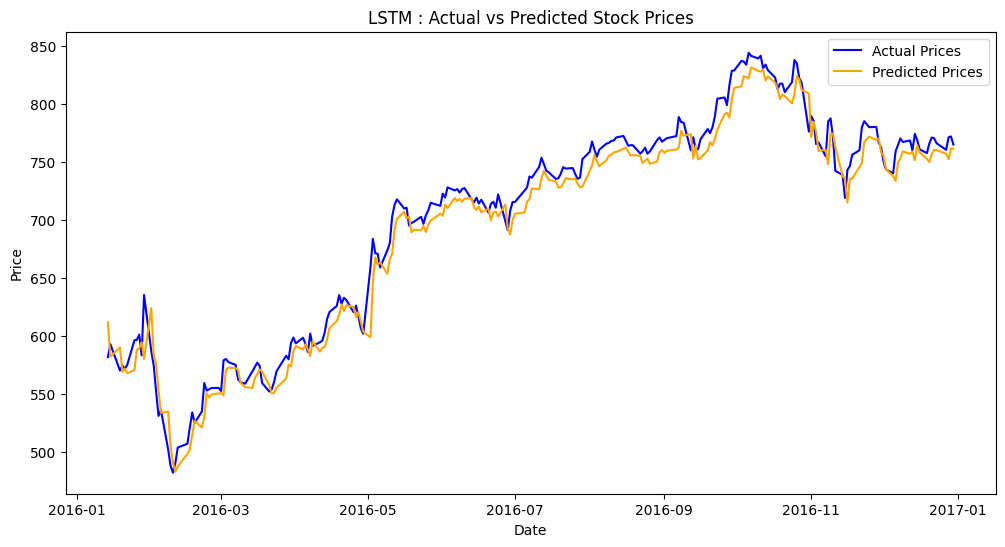

In [ ]:
y_test_inverse = scaler.inverse_transform(y_test_final.reshape(-1, 1))
test_dates = stock.iloc[lstm_train_size + look_back_value + 1:].index

# Plot the LSTM results : Actual vs Forecast #
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test_inverse, label='Actual Prices', color='blue')
plt.plot(test_dates, lstm_test_predict, label='Predicted Prices', color='orange')
plt.title('LSTM : Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

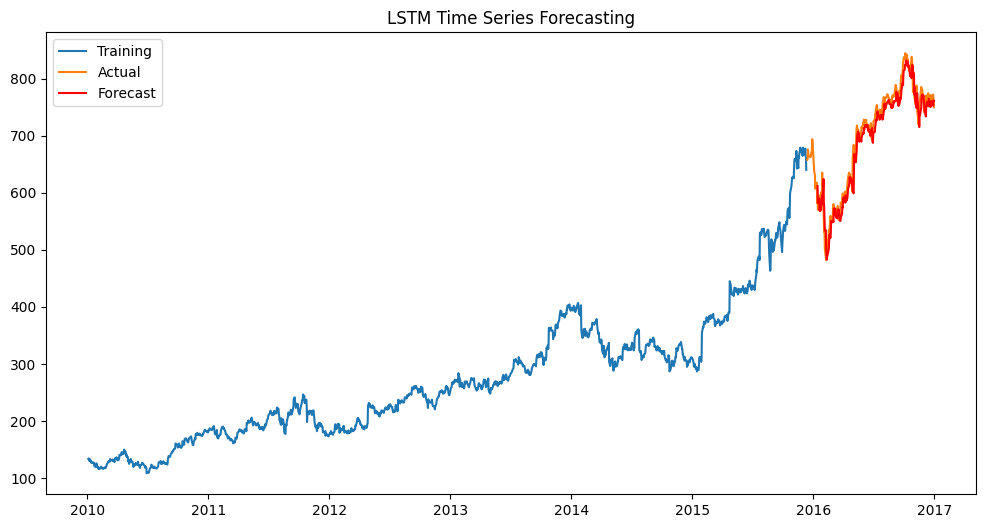

In [ ]:
# Plot the LSTM results #
plt.figure(figsize=(12, 6))
plt.plot(X_train['close'], label='Training')
plt.plot(X_test['close'], label='Actual')
predicted_dates = X_test.index[look_back_value+1:]  # Adjust based on your DataFrame
plt.plot(predicted_dates, lstm_test_predict, label='Forecast', color='red')
plt.title('LSTM Time Series Forecasting')
plt.legend()
plt.show()

In [ ]:
res_dict = {'Model': ['ARMA', 'SARIMA', 'Prophet', 'LSTM'],
           'RMSE': [arma_rmse, sarima_rmse, prophet_rmse ,lstm_rmse],
            'MAE': [arma_mae, sarima_mae, prophet_mae, lstm_mae],
           'R2 Score': [arima_r2, sarima_r2, prophet_r2, lstm_r2]}
results_df = pd.DataFrame(res_dict).set_index('Model')

results_df

,RMSE,MAE,R2 Score
Model,,,
ARMA,12.022077,8.302433,-0.000775
SARIMA,12.028861,8.306891,-0.001905
Prophet,12.248476,8.158271,-0.008445
LSTM,3.840577,14.750033,0.958735


### **Deployment**

*   Save the trained model to a file for future use.
*   Load the saved model and use it to make predictions on new data.
*   Create the API, train model on new ticker/symbol and make predictions on new data.


# **Key Highlights**


*   **Model Selection**: Evaluated ARIMA, SARIMA, LSTM and Prophet models based on their suitability for capturing trends, seasonality, and irregular patterns in stock price data.
*   **Parameter Optimization**: Conducted hyperparameter tuning for ARIMA and SARIMA models using techniques like grid search, leading to improved forecasting accuracy.
*   **Seasonality Detection**: Identified seasonal patterns in stock prices through SARIMA, demonstrating the model's ability to account for periodic fluctuations.
*   **Forecast Horizon**: Generated forecasts over various time horizons (short-term vs. long-term), providing valuable insights for different investment strategies.
*   **Residual Analysis**: Performed residual analysis to check for autocorrelation and normality, ensuring that model assumptions were satisfied and enhancing the reliability of forecasts.
*   **Prophet's Flexibility**: Leveraged Prophet's ability to incorporate holiday effects and custom seasonality, leading to improved forecasts during critical market events.
*   **Error Metrics Interpretation**: Analyzed MSE, RMSE, and R² scores to quantify model performance, providing a clear understanding of prediction accuracy and model reliability.
*   **Impact of External Factors**: Explored the influence of external factors (e.g., economic indicators, market sentiment) on stock price movements, enhancing the context of your forecasts.
*   **Actionable Insights**: Delivered actionable insights based on forecast results, aiding stakeholders in making informed investment decisions and risk management strategies.
*   **Best Model**: **LSTM** is best performing model among all four models.








# **Next steps and Recommendations**




*   Conduct further validation of the models using additional datasets to ensure robustness and generalizability of the forecasts.
*   Explore advanced techniques such as ensemble methods to combine predictions from multiple models for improved accuracy.
*   Develop a dashboard for visualizing forecasts, actual prices, and error metrics, providing stakeholders with an interactive tool for decision-making.
*   Plan for regular updates of the machine learning models with new data to maintain accuracy and relevance in a dynamic market environment.
*   Investigate the integration of deep learning algorithms (e.g., LSTM, GRU, CNN etc.) to enhance forecasting capabilities and capture complex patterns in the data.
*   Document the entire machine learning modeling process, including methodologies, parameter choices, and insights gained, facilitating knowledge sharing and future reference.
*   Plan for regular updates of the machine learning models with new data to maintain accuracy and relevance in a dynamic market environment.







